In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# PART 1

In [5]:
x = np.random.randint(20, size=15)
x

array([ 8, 18, 15, 13,  6,  5,  2,  8, 17,  6,  1,  3, 18, 16, 14])

In [6]:
x = x.reshape(3,5)
x

array([[ 8, 18, 15, 13,  6],
       [ 5,  2,  8, 17,  6],
       [ 1,  3, 18, 16, 14]])

In [7]:
x.shape

(3, 5)

In [8]:
y = np.where(x.max(axis=1).reshape(3,1)!=x, x, 0)
y

array([[ 8,  0, 15, 13,  6],
       [ 5,  2,  8,  0,  6],
       [ 1,  3,  0, 16, 14]])

In [9]:
diagnol = y.diagonal()
diagnol

array([8, 2, 0])

In [10]:
with open('diagnol.npy', 'wb') as f:
    np.save(f, diagnol)

In [11]:
with open('diagnol.npy', 'rb') as f:
    a = np.load(f)

print(a)

[8 2 0]


In [ ]:
# PART 2

In [12]:
df = pd.read_csv('data.csv')
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [13]:
df[df.isnull().any(axis=1)] 

,Duration,Pulse,Maxpulse,Calories
17,45,90,112,NaN
27,60,103,132,NaN
91,45,107,137,NaN
118,60,105,125,NaN
141,60,97,127,NaN


In [14]:
column_means = df.mean()
df = df.fillna(column_means)
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [15]:
df[df.isnull().any(axis=1)] 

,Duration,Pulse,Maxpulse,Calories


In [16]:
agged = df.agg(['min','max','count','mean'])
agged

,Duration,Pulse,Maxpulse,Calories
min,15.000000,80.000000,100.000000,50.300000
max,300.000000,159.000000,184.000000,1860.400000
count,169.000000,169.000000,169.000000,169.000000
mean,63.846154,107.461538,134.047337,375.790244


In [17]:
filteredDf = df[df["Calories"] > 500]
filteredDf = filteredDf[filteredDf["Calories"] < 1000]
filteredDf

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


In [18]:
newDf = df[df["Calories"] > 500]
newDf = newDf[newDf["Pulse"] < 100]
newDf

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [19]:
df_modified = df.filter(items=['Duration','Pulse','Calories'])
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [20]:
df = df.filter(items=['Duration','Pulse','Calories'])
df

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [21]:
df = df.astype({"Calories": 'int64'})
df

,Duration,Pulse,Calories
0,60,110,409
1,60,117,479
2,60,103,340
3,45,109,282
4,45,117,406
...,...,...,...
164,60,105,290
165,60,110,300
166,60,115,310
167,75,120,320


<AxesSubplot:xlabel='Duration', ylabel='Calories'>

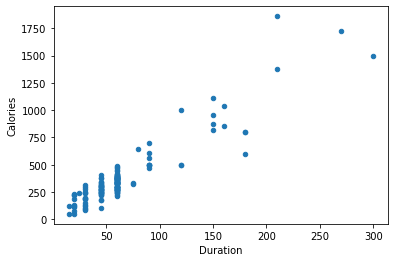

In [22]:
df.plot.scatter(x='Duration',y='Calories')

In [ ]:
#PART 3

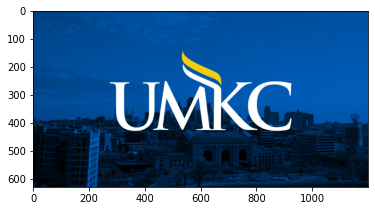

In [23]:
image = mpimg.imread("umkc.jpg")
plt.imshow(image)

In [24]:
image.shape

(630, 1200, 3)

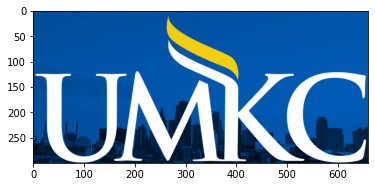

In [25]:
cropped  = image[130:430, 270:930, :]
plt.imshow(cropped)

In [26]:
mpimg.imsave("cropped_image.jpg", cropped)

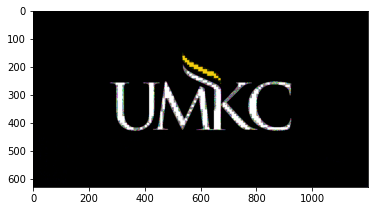

In [27]:
new = np.where([255,255,255] == image, image, [0,0,0]).astype("uint8")
new += np.where([243,206,14] == image, image, [0,0,0]).astype("uint8")
plt.imshow(new)
mpimg.imsave("np_where_image.jpg", new)
